Problem Statement

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

Strategy to solving this mystery:-

1. Process data and clean it
2. graphically represent data
3. Break test set up for training purposes
4. select model
5. Train and predict on model
6. submit prediction

Load Libraries


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Loads and read files

In [ ]:
#read files
#Reading train file:
train = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Titanic-Datasets/master/titanic_train.csv')
#Reading test file:
test = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Titanic-Datasets/master/titanic_test.csv')
#Reading gender file:
gender_file = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Titanic-Datasets/master/gender_submission.csv')

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
gender_file

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Check for null values and correct

In [ ]:
train.isnull().sum(), test.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64, PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=20)

train.Age=imputer.fit_transform(train.Age.values.reshape(-1,1))
test.Age=imputer.fit_transform(test.Age.values.reshape(-1,1))

train.Age=train.Age.astype(int)
test.Age=test.Age.astype(int)

In [ ]:
train.Age.isnull().sum().sum(), test.Age.isnull().sum().sum()

(0, 0)

In [ ]:
train.Fare=imputer.fit_transform(train.Fare.values.reshape(-1,1))
test.Fare=imputer.fit_transform(test.Fare.values.reshape(-1,1))

In [ ]:
train.Fare.isnull().sum().sum(), test.Fare.isnull().sum().sum()

(0, 0)

In [ ]:
# fill up missing values with mode
train['Cabin'] = train['Cabin'].fillna(train['Cabin'].mode()[0])
test['Cabin'] = test['Cabin'].fillna(test['Cabin'].mode()[0])

train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

In [ ]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S
416,1308,3,"Ware, Mr. Frederick",male,30,0,0,359309,8.0500,B57 B59 B63 B66,S


Preprocess the data

In [ ]:
train['Title'] = train['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
test['Title'] = test['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

In [ ]:
title=train.groupby('Title')['Survived'].sum().reset_index()
title

,Title,Survived
0,Capt,0
1,Col,1
2,Don,0
3,Dr,3
4,Jonkheer,0
5,Lady,1
6,Major,1
7,Master,23
8,Miss,127
9,Mlle,2


In [ ]:
title1={'Capt':1, 'Col':2, 'Don':3, 'Dr':4,'Jonkheer':5, 'Lady':6, 'Major': 7, 'Master':8, 'Miss':9, 
        'Mlle':10, 'Mme':11, 'Mr':12, 'Mrs':13, 'Ms':14, 'Rev':15, 'Sir':16, 'the Countess':17, 'Dona':18}
train.Title=train.Title.map(title1)
test.Title=test.Title.map(title1)

In [ ]:
title2=train.groupby('Title')['Survived'].sum().reset_index()
title2

,Title,Survived
0,1,0
1,2,1
2,3,0
3,4,3
4,5,0
5,6,1
6,7,1
7,8,23
8,9,127
9,10,2


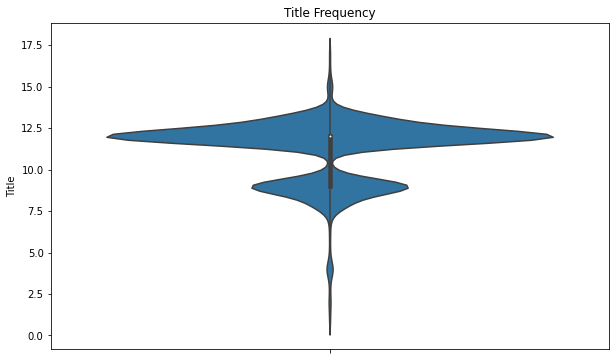

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Title Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Title"])
plt.show()

In [ ]:
train['Title'].isnull().sum().sum(), test['Title'].isnull().sum().sum()

(0, 0)

In [ ]:
pclass=train.groupby('Pclass')['Survived'].sum().reset_index()
pclass

,Pclass,Survived
0,1,136
1,2,87
2,3,119


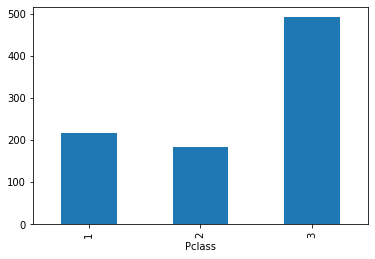

In [ ]:
train.groupby('Pclass').Survived.count().plot.bar(ylim=0)
plt.show()

In [ ]:
train['Pclass'].isnull().sum().sum(), test['Pclass'].isnull().sum().sum()

(0, 0)

In [ ]:
sex=train.groupby('Sex')['Survived'].sum().reset_index()
sex

,Sex,Survived
0,female,233
1,male,109


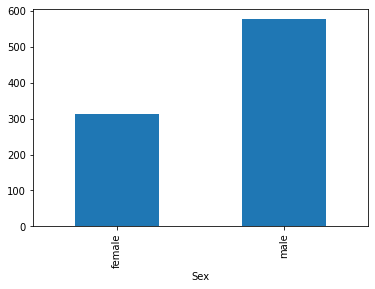

In [ ]:
train.groupby('Sex').Survived.count().plot.bar(ylim=0)
plt.show()

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

train.Sex=le.fit_transform(train.Sex)
test.Sex=le.fit_transform(test.Sex)

In [ ]:
sex2=train.groupby('Sex')['Survived'].sum().reset_index()
sex2

,Sex,Survived
0,0,233
1,1,109


In [ ]:
age=train.groupby('Age')['Survived'].sum().reset_index()
age

,Age,Survived
0,0,7
1,1,5
2,2,3
3,3,5
4,4,7
...,...,...
66,66,0
67,70,0
68,71,0
69,74,0


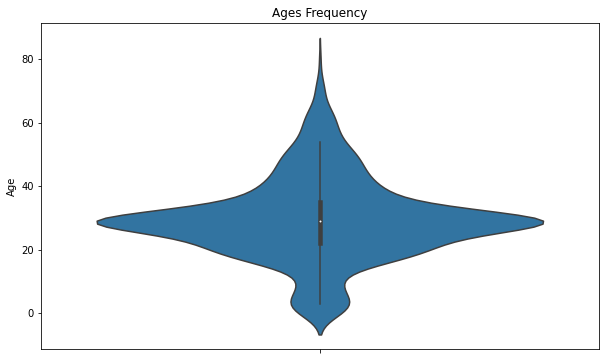

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Age"])
plt.show()

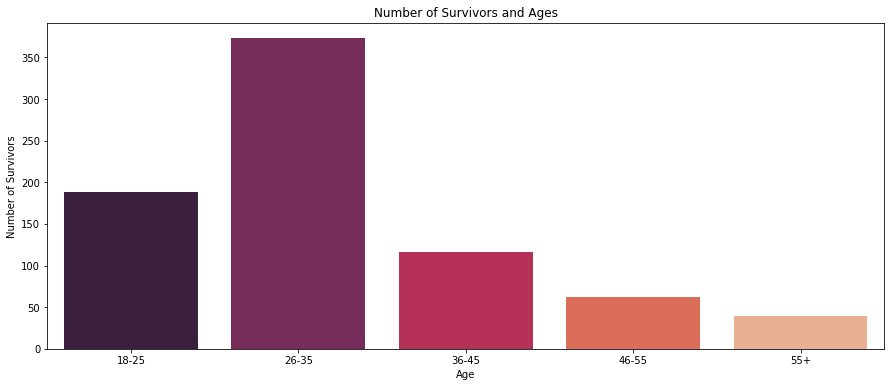

In [ ]:
age18_25 = train.Age[(train.Age <= 25) & (train.Age >= 18)]
age26_35 = train.Age[(train.Age <= 35) & (train.Age >= 26)]
age36_45 = train.Age[(train.Age <= 45) & (train.Age >= 36)]
age46_55 = train.Age[(train.Age <= 55) & (train.Age >= 46)]
age55above = train.Age[train.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Survivors and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Survivors")
plt.show()

In [ ]:
bins = [-1., 18., 35., 64., 65.+ np.inf]
names = ['child','young adult', 'middle aged', 'pensioner']

train['Age_Range'] = pd.cut(train['Age'], bins, labels=names)
test['Age_Range'] = pd.cut(test['Age'], bins, labels=names)

In [ ]:
age_range=train.groupby('Age_Range')['Survived'].sum().reset_index()
age_range

,Age_Range,Survived
0,child,70
1,young adult,189
2,middle aged,82
3,pensioner,1


In [ ]:
train.Age_Range=le.fit_transform(train.Age_Range)
test.Age_Range=le.fit_transform(test.Age_Range)

In [ ]:
age_range1=train.groupby('Age_Range')['Survived'].sum().reset_index()
age_range1

,Age_Range,Survived
0,0,70
1,1,82
2,2,1
3,3,189


In [ ]:
train.Age_Range.isnull().sum(), test.Age_Range.isnull().sum()

(0, 0)

In [ ]:
train['Family'] = train.SibSp + train.Parch
test['Family'] = test.SibSp + test.Parch
train.Family.sum(), test.Family.sum()

(806, 351)

In [ ]:
family=train.groupby('Family')['Survived'].sum().reset_index()
family

,Family,Survived
0,0,163
1,1,89
2,2,59
3,3,21
4,4,3
5,5,3
6,6,4
7,7,0
8,10,0


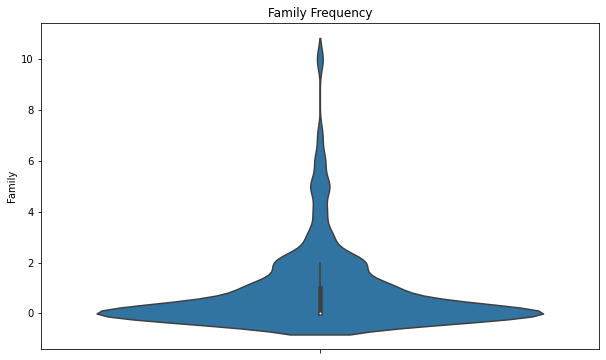

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Family Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Family"])
plt.show()

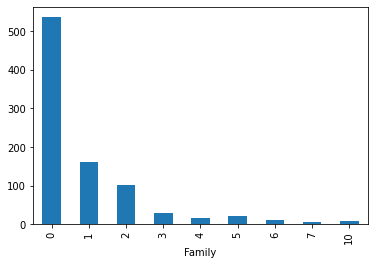

In [ ]:
train.groupby('Family').Survived.count().plot.bar(ylim=0)
plt.show()

In [ ]:
fare=train.groupby('Fare')['Survived'].sum().reset_index()
fare

,Fare,Survived
0,0.0000,1
1,4.0125,0
2,5.0000,0
3,6.2375,0
4,6.4375,0
...,...,...
243,227.5250,3
244,247.5208,1
245,262.3750,2
246,263.0000,2


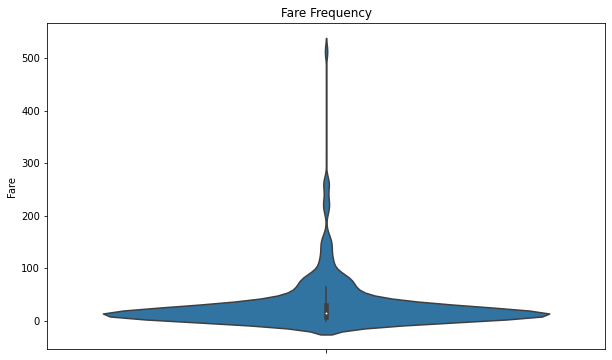

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Fare Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Fare"])
plt.show()

In [ ]:
bins0 = [-1., 100., 200., 300., 400., 500.+ np.inf]
names0 = ['0-99', '100-199', '200-299', '300-399', '400+']

train['Fare_Range'] = pd.cut(train['Fare'], bins0, labels=names0)
test['Fare_Range'] = pd.cut(test['Fare'], bins0, labels=names0)

In [ ]:
fare_range=train.groupby('Fare_Range')['Survived'].sum().reset_index()
fare_range

,Fare_Range,Survived
0,0-99,303
1,100-199,25
2,200-299,11
3,300-399,0
4,400+,3


In [ ]:
train.Fare_Range=le.fit_transform(train.Fare_Range)
test.Fare_Range=le.fit_transform(test.Fare_Range)

In [ ]:
fare_range1=train.groupby('Fare_Range')['Survived'].sum().reset_index()
fare_range1

,Fare_Range,Survived
0,0,303
1,1,25
2,2,11
3,3,3


In [ ]:
train.Fare_Range.isnull().sum(), test.Fare_Range.isnull().sum()

(0, 0)

In [ ]:
embark=train.groupby('Embarked')['Survived'].sum().reset_index()
embark

,Embarked,Survived
0,C,93
1,Q,30
2,S,219


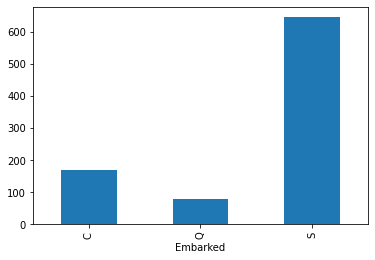

In [ ]:
train.groupby('Embarked').Survived.count().plot.bar(ylim=0)
plt.show()

In [ ]:
train.Embarked=le.fit_transform(train.Embarked)
test.Embarked=le.fit_transform(test.Embarked)

In [ ]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Range,Family,Fare_Range
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,B96 B98,2,12,3,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,0,13,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,B96 B98,2,9,3,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,2,13,3,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,B96 B98,2,12,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27,0,0,211536,13.0000,B96 B98,2,15,3,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19,0,0,112053,30.0000,B42,2,9,3,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29,1,2,W./C. 6607,23.4500,B96 B98,2,9,3,3,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26,0,0,111369,30.0000,C148,0,12,3,0,0


In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Range,Family,Fare_Range
0,892,3,"Kelly, Mr. James",1,34,0,0,330911,7.8292,B57 B59 B63 B66,1,12,3,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47,1,0,363272,7.0000,B57 B59 B63 B66,2,13,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",1,62,0,0,240276,9.6875,B57 B59 B63 B66,1,12,1,0,0
3,895,3,"Wirz, Mr. Albert",1,27,0,0,315154,8.6625,B57 B59 B63 B66,2,12,3,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22,1,1,3101298,12.2875,B57 B59 B63 B66,2,13,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,30,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,2,12,3,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39,0,0,PC 17758,108.9000,C105,0,18,1,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,2,12,1,0,0
416,1308,3,"Ware, Mr. Frederick",1,30,0,0,359309,8.0500,B57 B59 B63 B66,2,12,3,0,0


In [ ]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
Title            int64
Age_Range        int64
Family           int64
Fare_Range       int64
dtype: object

In [ ]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
Title            int64
Age_Range        int64
Family           int64
Fare_Range       int64
dtype: object

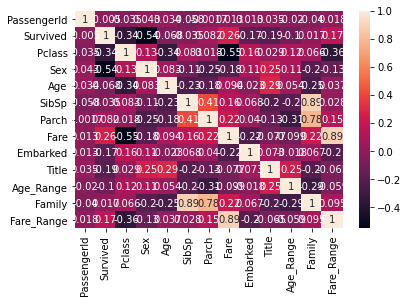

In [ ]:
#create a heatmap to correlate promotion
plt.figure(figsize=(6,4))
cmap=train.corr()
sns.heatmap(cmap, annot=True)

Set up X and y values

In [ ]:
y = train["Survived"]
features = ["Pclass", "Sex", "Family", "Embarked", "Title", 
            "Age_Range", "Fare_Range"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

In [ ]:
X

In [ ]:
X_test

,Pclass,Sex,Family,Embarked,Title,Age_Range,Fare_Range
0,3,1,0,1,12,3,0
1,3,0,1,2,13,1,0
2,2,1,0,1,12,1,0
3,3,1,0,2,12,3,0
4,3,0,2,2,13,3,0
...,...,...,...,...,...,...,...
413,3,1,0,2,12,3,0
414,1,0,0,0,18,1,1
415,3,1,0,2,12,1,0
416,3,1,0,2,12,3,0


Split the training file for training and testing

In [ ]:
#split train set for testing
from sklearn.model_selection import train_test_split

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

Select model

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

selection = LogisticRegression(penalty='l1', solver='liblinear')
selection.fit(X_train, Y_train)
#create hyper parameters
penalty=['l1', 'l2']
C=np.logspace(0,4,10)
hyperparameters=dict(C=C, penalty=penalty)
#create grid search
clf=GridSearchCV(selection, hyperparameters, cv=5, verbose=0)
#fit the model
best_model=clf.fit(X_train, Y_train)
print(clf.score(X_train, Y_train))

0.8061797752808989


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

name='LR'
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(best_model, X_train, Y_train, cv=kfold, scoring='accuracy')
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.794933 (0.042378)


In [ ]:
y_pred=clf.predict(X_validation)

In [ ]:
df=pd.DataFrame({'Actual': Y_validation, 'Predicted':y_pred})
df

,Actual,Predicted
862,1,1
223,0,0
84,1,1
680,0,1
535,1,1
...,...,...
796,1,1
815,0,0
629,0,0
421,0,0


Make predictions

In [ ]:
predictions = clf.predict(X_test)

In [ ]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Submit predictions

In [ ]:
#upload submission
my_submission = pd.read_csv("my_submission.csv")
my_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
